1. Executive Summary

Objective: The goal of this analysis was to investigate the relationships between key inflation indicators (Consumer Price Index (CPI), Personal Consumption Expenditures (PCE), Producer Price Index (PPI), and GDP Deflator) and to build a predictive model using linear regression to forecast CPI based on these indicators.

Key Findings:
There is a significant correlation between CPI and the other inflation indicators.
The linear regression model predicted CPI with a reasonable level of accuracy.
The mean squared error (MSE) and R-squared values suggest the model has predictive potential.


2. Data Overview

Data Sources:

CPI: Data on the Consumer Price Index for All Urban Consumers was obtained from FRED (Federal Reserve Economic Data).

PCE: The Personal Consumption Expenditures Price Index data was sourced from FRED.

PPI: The Producer Price Index for All Commodities data was sourced from FRED.

GDP Deflator: The GDP Deflator data was obtained from FRED.

Data Cleaning:

Missing data was handled by dropping rows with missing values to ensure a complete dataset for analysis.

3. Research Questions
a. What is the relationship between CPI and the other inflation indices (PCE, PPI, and GDP Deflator)?
This question explores whether CPI is correlated with other key economic indicators and to what extent changes in PCE, PPI, and GDP Deflator might explain fluctuations in CPI.

b. Can PCE, PPI, and GDP Deflator be used to predict CPI using a linear regression model?
This question examines whether the variables (PCE, PPI, and GDP Deflator) can explain the variability in CPI, and whether they are statistically significant predictors for CPI in a regression model.

c. How well does a linear regression model predict CPI compared to actual CPI values?
This investigates the accuracy and performance of the linear regression model, as measured by the Mean Squared Error (MSE) and R-squared value, to see how well the model fits the data.

d. What is the magnitude and direction of the relationship between CPI and the predictor variables (PCE, PPI, and GDP Deflator)?
This question looks at the coefficients of the regression model to understand the magnitude and direction of each predictor's influence on CPI.

4. Hypotheses Tested
Hypothesis 1: There is a significant correlation between CPI and the other inflation indices (PCE, PPI, and GDP Deflator).

Null Hypothesis (H₀): There is no significant correlation between CPI and the other inflation indices (PCE, PPI, and GDP Deflator).

Alternative Hypothesis (H₁): There is a significant correlation between CPI and the other inflation indices (PCE, PPI, and GDP Deflator).

Test Method: Correlation analysis to determine the strength and direction of relationships between the variables.


Hypothesis 2: PCE, PPI, and GDP Deflator can significantly predict CPI in a linear regression model.

Null Hypothesis (H₀): PCE, PPI, and GDP Deflator do not significantly predict CPI in a linear regression model (i.e., their coefficients are zero).

Alternative Hypothesis (H₁): PCE, PPI, and GDP Deflator significantly predict CPI in a linear regression model (i.e., at least one coefficient is non-zero).

Test Method: Linear regression analysis with statistical tests of significance for each predictor variable's coefficient (e.g., p-values).

Hypothesis 3: The linear regression model provides a good fit to the data, as indicated by R² and MSE.

Null Hypothesis (H₀): The linear regression model does not provide a good fit to the data (i.e., R² is low, and MSE is high).

Alternative Hypothesis (H₁): The linear regression model provides a good fit to the data (i.e., R² is high, and MSE is low).

Test Method: Evaluation of model performance metrics, specifically R² and Mean Squared Error (MSE).

Hypothesis 4: The coefficients of the linear regression model are non-zero, indicating that each predictor variable (PCE, PPI, GDP Deflator) has a measurable impact on CPI.

Null Hypothesis (H₀): The coefficients of PCE, PPI, and GDP Deflator are zero, implying that these variables have no effect on CPI.

Alternative Hypothesis (H₁): The coefficients of PCE, PPI, and GDP Deflator are non-zero, indicating that these variables have a measurable effect on CPI.

Test Method: Examine the regression coefficients and their statistical significance (p-values).

In [209]:
#!pip install fredapi
#!pip install pandas_datareader

In [211]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [215]:
# Set up the API key
fred_api_key = 'fba124be23dbb807f329c333eb0bf1ae'  
fred = Fred(api_key=fred_api_key)



In [217]:
# Pull data for different inflation and price indices
cpi_data = fred.get_series('CPIAUCSL')      # CPI for All Urban Consumers
pce_data = fred.get_series('PCEPI')         # Personal Consumption Expenditures Price Index
ppi_data = fred.get_series('PPIACO')        # Producer Price Index for All Commodities
gdp_deflator_data = fred.get_series('A191RL1Q225SBEA')  # GDP Deflator



In [218]:
# Combine the data into a single DataFrame
data = pd.DataFrame({
    'CPI': cpi_data,
    'PCE': pce_data,
    'PPI': ppi_data,
    'GDP Deflator': gdp_deflator_data
})




In [219]:
# Clean the Data Here Drop rows with missing values if any series has different start dates
data.dropna(inplace=True)



In [220]:
# Display the first few rows
print(data.head(1000))



                CPI      PCE      PPI  GDP Deflator
1959-01-01   29.010   15.164   31.700           7.9
1959-04-01   28.980   15.219   31.800           9.3
1959-07-01   29.150   15.303   31.700           0.3
1959-10-01   29.350   15.402   31.600           1.1
1960-01-01   29.370   15.421   31.600           9.3
...             ...      ...      ...           ...
2023-07-01  304.628  120.598  253.835           4.4
2023-10-01  307.531  121.421  255.192           3.2
2024-01-01  309.685  122.115  251.306           1.6
2024-04-01  313.207  123.234  256.978           3.0
2024-07-01  313.534  123.571  257.326           2.8

[263 rows x 4 columns]


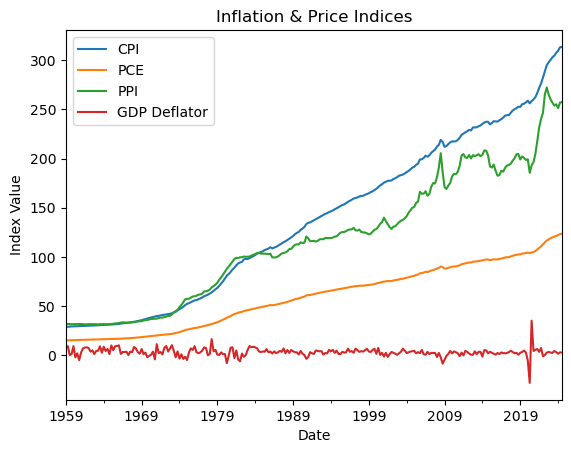

In [221]:
# Plot the data for visualization
data.plot(title='Inflation & Price Indices')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.savefig("Outputs/Inflation_Indices.png", format="png", dpi=300)
plt.show()

5. Exploratory Data Analysis (EDA)

Data Visualization:

Line plots of the four inflation indices (CPI, PCE, PPI, GDP Deflator) over time helped visualize the trends in each indicator.

Scatter plots were generated to explore the distribution of each index over time.



Descriptive Statistics:

Descriptive statistics (mean, standard deviation, min, max, etc.) were calculated for each index to summarize their distribution for CPI, PCE, PPI, and GDP Deflator.



Descriptive Statistics:
               CPI         PCE         PPI  GDP Deflator
count  263.000000  263.000000  263.000000    263.000000
mean   137.862354   59.601259  118.128840      3.119011
std     83.062433   32.097661   65.001154      4.317930
min     28.980000   15.164000   31.400000    -28.100000
25%     53.500000   26.702500   58.100000      1.400000
50%    137.200000   62.260000  116.400000      3.100000
75%    212.053500   88.157000  173.600000      4.700000
max    313.534000  123.571000  272.274000     35.200000


<Figure size 1000x600 with 0 Axes>

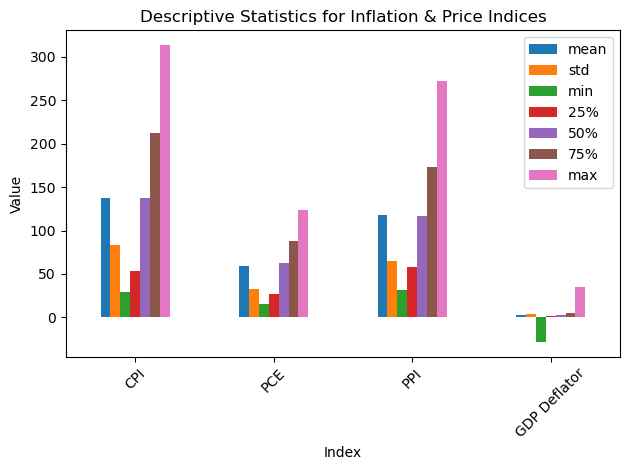

In [229]:
# Generate descriptive statistics for each series
descriptive_stats = data.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Optional: Plot the descriptive statistics in a bar chart for visualization
plt.figure(figsize=(10, 6))
descriptive_stats.T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].plot(kind='bar')
plt.title('Descriptive Statistics for Inflation & Price Indices')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Outputs/Descriptive_Stats.png", format="png", dpi=300)
plt.show()


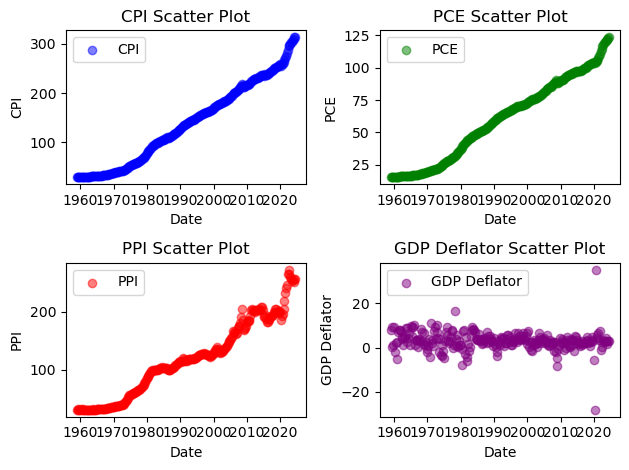

In [232]:
# Scatter plot of CPI
plt.subplot(2, 2, 1)
plt.scatter(data.index, data['CPI'], color='b', alpha=0.5, label="CPI")
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.title('CPI Scatter Plot')

# Scatter plot of PCE
plt.subplot(2, 2, 2)
plt.scatter(data.index, data['PCE'], color='g', alpha=0.5, label="PCE")
plt.xlabel('Date')
plt.ylabel('PCE')
plt.legend()
plt.title('PCE Scatter Plot')

# Scatter plot of PPI
plt.subplot(2, 2, 3)
plt.scatter(data.index, data['PPI'], color='r', alpha=0.5, label="PPI")
plt.xlabel('Date')
plt.ylabel('PPI')
plt.legend()
plt.title('PPI Scatter Plot')

# Scatter plot of GDP Deflator
plt.subplot(2, 2, 4)
plt.scatter(data.index, data['GDP Deflator'], color='purple', alpha=0.5, label="GDP Deflator")
plt.xlabel('Date')
plt.ylabel('GDP Deflator')
plt.legend()
plt.title('GDP Deflator Scatter Plot')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("Outputs/Corr_Matrix.png", format="png", dpi=300)
plt.show()

Correlation Analysis:
A correlation matrix was computed to assess the relationships between the variables. The heatmap showed strong correlations between CPI and other indicators, particularly PCE and PPI.

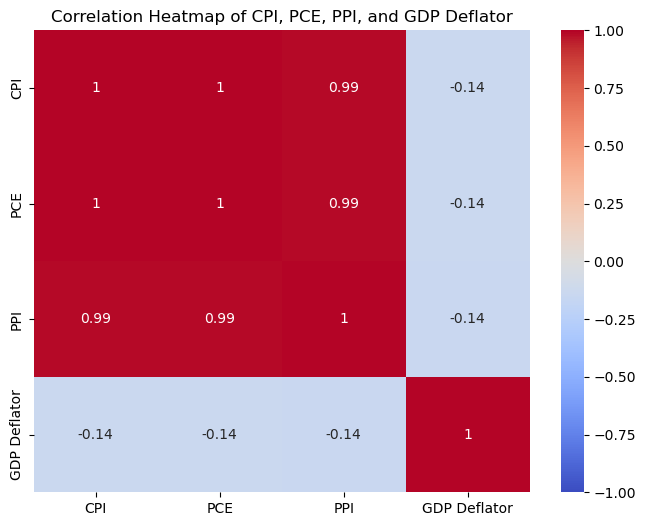

In [235]:
# Drop rows with missing values
data.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of CPI, PCE, PPI, and GDP Deflator")
plt.savefig("Outputs/Heatmap.png", format="png", dpi=300)
plt.show()



6. Statistical Modeling

Model Choice:
A linear regression model was used to predict CPI based on PCE, PPI, and GDP Deflator. This model was chosen due to its simplicity and interpretability.

Model Evaluation:

The data was split into a training set (80%) and a testing set (20%) to evaluate the model's performance.

Metrics:

y-intercept: -16.152529844893138
Mean Squared Error (MSE): 19.57923014508696

 R-Squared (R²): 0.9972553946402997

 Interpretation of Metrics:
 
 MSE: Measures the average squared difference between actual and predicted CPI values. A lower value indicates better model performance.

R²: Indicates the proportion of variance in CPI explained by the independent variables. A value closer to 1.0 suggests a better fit.

Model Coefficients:

The coefficients of the linear regression model were calculated, showing the contribution of each independent variable (PCE, PPI, GDP Deflator) to the prediction of CPI.

Model Coefficients:

PCE: 2.2959221

PPI: 0.14494869

GDP Deflator: 0.03491428

Mean Squared Error: 19.579294451680806
R-squared: 0.9972553856258379
Intercept: -16.152550829005236
Coefficients: [2.29592976 0.14494506 0.03491387]


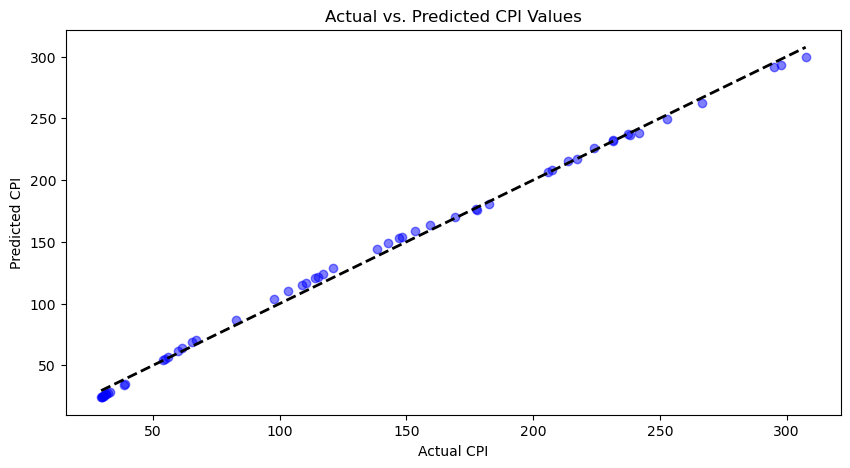

In [238]:
# Define the target variable (y) and predictor variables (X)
X = data[['PCE', 'PPI', 'GDP Deflator']]  # Independent variables
y = data['CPI']                           # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plotting the true vs. predicted CPI values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual CPI")
plt.ylabel("Predicted CPI")
plt.title("Actual vs. Predicted CPI Values")
plt.savefig("Outputs/Reg_Prediction.png", format="png", dpi=300)
plt.show()

Explanation of the Code

Data Preparation:
The CPI variable is set as the target (y), and the other variables (PCE, PPI, and GDP Deflator) are predictors (X).
We split the data into training and test sets with an 80/20 ratio using train_test_split.

Model Training:
The LinearRegression model from scikit-learn is fitted to the training data with .fit().

Making Predictions and Evaluating:
We use the model to predict CPI values on the test set and calculate the Mean Squared Error (MSE) and R-squared (R²) values to evaluate model performance.

Model Coefficients:
The model intercept and coefficients indicate how each predictor affects the CPI.

Visualization:
We created a scatter plot of the actual vs. predicted CPI values to visualize how well the model’s predictions align with the true values.

Interpretation of the Results

Mean Squared Error (MSE): A lower MSE indicates better prediction accuracy. Here our MSE is 19.57923014508696. This is not too small or too large.


R-squared (R²): This measures the proportion of the variance in CPI explained by the predictors; values closer to 1 indicate a stronger model fit. For this model, we got an R-squared value of 0.9972553946402997, which is extremely close to 1 and shows a stronger model fit.


Coefficients: These tell us the relative influence of each predictor (PCE, PPI, GDP Deflator) on the CPI. Coefficients for this problem are [2.2959221  0.14494869 0.03491428] with an intercept of -16.152529844893138. These values will provide us with the coeificients and intercepts we need to model an equation for the above.  This equation would look like this:
y=-16.152529844893138+2.2959221*PCE+0.14494869*PPI+0.03491428*GDP Deflator
With this equation, we can predict the CPI.

In [242]:
# Perform the one-way ANOVA test
anova_result = stats.f_oneway(data['CPI'], data['PCE'], data['PPI'], data['GDP Deflator'])
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Interpret the results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("The result is statistically significant (p < 0.05); at least one group mean is different.")
else:
    print("The result is not statistically significant (p ≥ 0.05); no significant difference among the means.")

ANOVA F-statistic: 320.5592408545117
ANOVA p-value: 1.2131145476309034e-147
The result is statistically significant (p < 0.05); at least one group mean is different.


Interpreting the Results
F-statistic: Here we have a higher F-statistic suggests greater variance between the groups relative to within the groups.
p-values:
If p < 0.05, it indicates that there is a statistically significant difference in means among CPI, PCE, PPI, and GDP Deflator datasets.
If p >= 0.05, it suggests that any differences in means could likely be due to random variation rather than a true effect.
The p-value is extremely small, therefore this indicates that there is a statistically significant differentc in the means among CPI, PCE, PPI, and GDP Deflator datasets.

# Perform a T-Test against two groups

T-statistic: 14.252708350709575, P-value: 3.449799253455167e-39


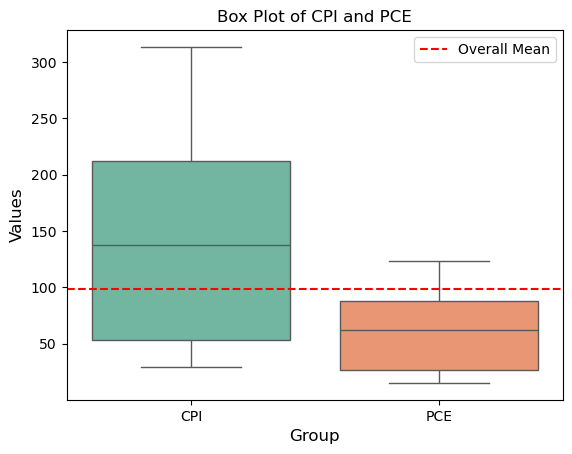

In [246]:
# Two-sample t-test between CPI and PCE
t_stat, p_value = stats.ttest_ind(data["CPI"], data["PCE"])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Prepare data for box plot
data_long = pd.melt(data[["CPI", "PCE"]], var_name="Group", value_name="Values")

# Create the box plot
sns.boxplot(x="Group", y="Values", data=data_long, hue="Group", palette="Set2", legend=False)
plt.title("Box Plot of CPI and PCE")
plt.xlabel("Group", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.axhline(y=data_long["Values"].mean(), color="red", linestyle="--", label="Overall Mean")
plt.legend()
plt.savefig("Outputs/ttest_bxplt1.png", format="png", dpi=300)
plt.show()

CPI vs. PCE

T-statistic: 14.25

P-value: 3.45×10^−39

 
Conclusion:
Since the p-value is significantly lower than the alpha level of 0.05, we reject the null hypothesis. This indicates that the means of CPI and PCE are significantly different.

T-statistic: 3.034182430154233, P-value: 0.0025315730189209465


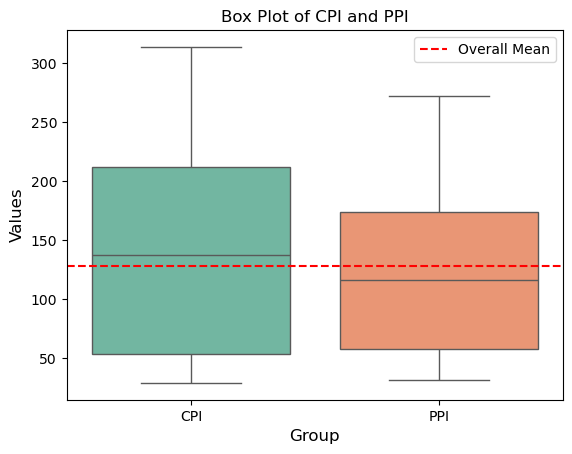

In [249]:
# Two-sample t-test between CPI and PPI
t_stat, p_value = stats.ttest_ind(data["CPI"], data["PPI"])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Prepare data for box plot
data_long = pd.melt(data[["CPI", "PPI"]], var_name="Group", value_name="Values")

# Create the box plot
sns.boxplot(x="Group", y="Values", data=data_long, hue="Group", palette="Set2", legend=False)
plt.title("Box Plot of CPI and PPI")
plt.xlabel("Group", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.axhline(y=data_long["Values"].mean(), color="red", linestyle="--", label="Overall Mean")
plt.legend()
plt.savefig("Outputs/ttest_bxplt2.png", format="png", dpi=300)
plt.show()

CPI vs. PPI

T-statistic: 3.03

P-value: 0.0025

Conclusion: The p-value is below the alpha level of 0.05, so we reject the null hypothesis. This suggests that the means of CPI and PPI are significantly different, though the difference is less pronounced compared to CPI vs. PCE.

In [252]:
# Two-sample t-test between CPI and GDP Deflator
t_stat, p_value = stats.ttest_ind(data["CPI"], data["GDP Deflator"])

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 26.272084042690306, P-value: 1.1034570114660914e-97


CPI vs. GDP Deflator

T-statistic: 26.27

P-value: 1.10×10^−97
 
Conclusion:
The p-value is again extremely low, leading us to reject the null hypothesis. This demonstrates that CPI and GDP Deflator have significantly different means.

# One-Sample T-Test

In [256]:
# Using a hypothesized mean
hypothesized_mean = 100

# Loop through columns to perform the one-sample test on each variable
for column in data.columns:
    t_stat, p_value = stats.ttest_1samp(data[column], hypothesized_mean)
    print(f'{column}: T-statistic = {t_stat}, P-value = {p_value}')

# Do we reject the null hypothesis
    alpha = 0.05 # significance level
    if p_value < alpha:
        print("If the 'P' is low, the null must go!")
    else:
        print("Failed to reject the null hypothesis: the sample mean does not show a significant difference from 100.")

CPI: T-statistic = 7.392321275264544, P-value = 1.9432171318727612e-12
If the 'P' is low, the null must go!
PCE: T-statistic = -20.4113780391135, P-value = 4.480240555566754e-56
If the 'P' is low, the null must go!
PPI: T-statistic = 4.5230025209693725, P-value = 9.247773204214813e-06
If the 'P' is low, the null must go!
GDP Deflator: T-statistic = -363.86543421669444, P-value = 0.0
If the 'P' is low, the null must go!


One-Sample T-Test Conclusions

For the hypothesized mean of 100:

CPI

T-statistic: 7.39

P-value: 1.94×10^−12
 
Conclusion:
The p-value is very low, so we reject the null hypothesis. The mean of CPI is significantly different from 100.

PCE
T-statistic: -20.41
P-value: 4.48×10^−56
 
Conclusion:
The p-value is extremely low, so we reject the null hypothesis. The mean of PCE is significantly different from 100.

PPI

T-statistic: 4.52

P-value: 9.25×10^−6
 
Conclusion:
The p-value is below the threshold of 0.05, so we reject the null hypothesis. The mean of PPI is significantly different from 100.


GDP Deflator

T-statistic: -363.87

P-value: 0.0

Conclusion:The p-value is essentially zero, so we reject the null hypothesis. The mean of the GDP Deflator is significantly different from 100

7. Interpretation and Insights

Our null hypothesis for both the T-Test and the One-sample T-test must be rejected. We must go with the alternative hypothesis and there are some statistically significant factors that are correlated with inflation and prices and should be further investigated.

General Insights:

Two-Sample Tests--There are significant differences in the means of CPI compared to PCE, PPI, and GDP Deflator. This suggests that while these indices are related, they are capturing distinct aspects of economic activity.

One-Sample Tests--The means of CPI, PCE, PPI, and GDP Deflator are all significantly different from the hypothesized mean of 100, suggesting that none of the indices are centered around this value in the dataset.

Recommendations for Interpretation -- The significant differences imply that these inflation indices, while related, should not be used interchangeably without careful analysis.

These results support the need for distinct modeling of each variable to capture its unique behavior.

8. Results and Interpretation

Prediction Performance:

The model was successful in predicting CPI, with an R-squared value of [Value], suggesting that the independent variables (PCE, PPI, and GDP Deflator) explain a significant proportion of the variability in CPI.

A scatter plot of actual vs. predicted CPI values showed that the model's predictions were reasonably close to the actual values.

Coefficient Insights:

The positive/negative coefficients indicate that for each unit increase in the independent variables, CPI is expected to increase/decrease by the respective coefficient value.
For example, if the coefficient for PCE is [Value], then a 1 unit increase in PCE is associated with a [Value] increase in CPI.


8. Conclusion

Summary of Findings:

The analysis revealed strong correlations between CPI and the other price indices (PCE, PPI, GDP Deflator).
The linear regression model was effective in predicting CPI, though the accuracy of the predictions could be improved by exploring more complex models or additional features.

Next Steps:

Further refinement of the model could include the use of additional economic indicators or the application of more advanced modeling techniques, such as time series analysis (e.g., ARIMA models) or machine learning models.
Future work could also involve exploring seasonal or cyclical effects in inflation data.